In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 1000

In [3]:
full_dataset = pd.read_csv(r'US_Accidents_Dec21_updated.csv')

In [4]:
print(full_dataset)

                ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.11206

In [5]:
# Analyze values in column "Severity" (impact on traffic)
filtered_data = full_dataset[full_dataset["Severity"]==2]
print(filtered_data)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print(full_dataset["Severity"].unique())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
# null values
print(full_dataset["Severity"].isnull().sum())

                ID  Severity           Start_Time             End_Time  \
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
5              A-6         2  2016-02-08 08:16:57  2016-02-08 14:16:57   
6              A-7         2  2016-02-08 08:15:41  2016-02-08 14:15:41   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
1         39.86542  -84.06280  39.86501  -8

In [6]:
all_types = full_dataset.dtypes
print(all_types)

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [7]:
# Analyze values in column "Start_Time"
# null values
print(full_dataset["Start_Time"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
#conversion from object to datetime64[ns]
full_dataset["Start_Time"] = pd.to_datetime(full_dataset["Start_Time"])
print(full_dataset["Start_Time"])

0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]


In [8]:
# Analyze values in column "End_Time"
# null values
print(full_dataset["End_Time"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
#conversion from object to datetime64[ns]
full_dataset["End_Time"] = pd.to_datetime(full_dataset["End_Time"])
print(full_dataset["End_Time"])

0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0         2016-02-08 06:37:08
1         2016-02-08 11:56:20
2         2016-02-08 12:15:39
3         2016-02-08 12:51:45
4         2016-02-08 13:53:43
                  ...        
2845337   2019-08-23 18:32:01
2845338   2019-08-23 19:38:23
2845339   2019-08-23 19:28:49
2845340   2019-08-23 19:29:42
2845341   2019-08-23 19:21:31
Name: End_Time, Length: 2845342, dtype: datetime64[ns]



Difference of end time and start time :
 0         0 days 06:00:00
1         0 days 06:00:00
2         0 days 06:00:00
3         0 days 06:00:00
4         0 days 06:00:00
                ...      
2845337   0 days 00:28:36
2845338   0 days 00:26:53
2845339   0 days 00:28:28
2845340   0 days 00:29:21
2845341   0 days 00:29:25
Name: duration, Length: 2845342, dtype: timedelta64[ns]


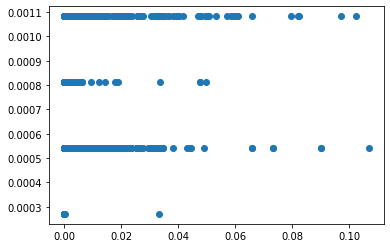

In [9]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
  


# create column incidents duration (difference between end time and start time)
full_dataset['duration'] = full_dataset['End_Time'] - full_dataset['Start_Time']
print("\nDifference of end time and start time :\n", full_dataset['duration'])

duration_normalized = preprocessing.normalize([np.array(full_dataset['duration'])])
severity_normalized = preprocessing.normalize([np.array(full_dataset['Severity'])])

  
plt.scatter(duration_normalized, severity_normalized)
plt.show()


In [10]:
# check null values for latitude and longitude
print("Null values for 'Start_Lat'",full_dataset["Start_Lat"].isnull().sum())
print("Null values for 'Start_Lng'",full_dataset["Start_Lng"].isnull().sum())
print("Null values for 'End_Lat'",full_dataset["End_Lat"].isnull().sum())
print("Null values for 'End_Lng'",full_dataset["End_Lng"].isnull().sum())

# convert latitude and longitude to another type??? --> check software behaviours!

Null values for 'Start_Lat' 0
Null values for 'Start_Lng' 0
Null values for 'End_Lat' 0
Null values for 'End_Lng' 0


Null values for 'Distance' 0


c:\Users\Anna\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


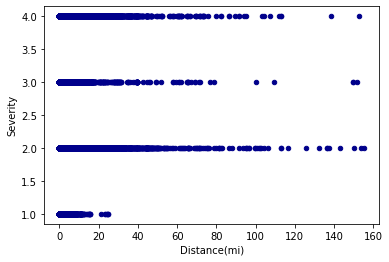

In [11]:
#!pip install matplotlib
#import matplotlib.pyplot as plt
#full_dataset.plot(x='ID', y='Severity')


# check null values for distance
print("Null values for 'Distance'",full_dataset["Distance(mi)"].isnull().sum())

ax2 = full_dataset.plot.scatter(x='Distance(mi)',y='Severity',c='DarkBlue')

In [12]:
# delete attribute "description"

full_dataset.drop('Description', inplace=True, axis=1)
print(full_dataset) # 47 columns now

                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  Number  \
0        40.108910  -83.092860  40.112060  -83.031870   

In [13]:
# Analyze values in column "Number"
# null values
print("Null values: ")
print(full_dataset["Number"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

# delete attribute "Number"
full_dataset.drop('Number', inplace=True, axis=1)
print(full_dataset) # 46 columns now

Null values: 
1743911
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_L

In [14]:
# Analyze values in column "Street"
# null values
print("Null values: ")
print(full_dataset["Street"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
# delete attribute "Street"
full_dataset.drop('Street', inplace=True, axis=1)
print(full_dataset) # 45 columns now

Null values: 
2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    

In [15]:
# Analyze values in column "Side"
# null values
print("Null values: ")
print(full_dataset["Side"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

Null values: 
0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [16]:
# check null values for City, County, State, Zipcode
print("Null values for 'City': ",full_dataset["City"].isnull().sum())
print("Null values for 'County': ",full_dataset["County"].isnull().sum())
print("Null values for 'State': ",full_dataset["State"].isnull().sum())
print("Null values for 'Zipcode': ",full_dataset["Zipcode"].isnull().sum())

Null values for 'City':  137
Null values for 'County':  0
Null values for 'State':  0
Null values for 'Zipcode':  1319


In [17]:
#Removing rows with null values for 'City'
full_dataset = full_dataset.dropna(subset = ["City"], how = 'all')
print("Null values for 'City': ",full_dataset["City"].isnull().sum())

#Removing column "Zipcode" 
full_dataset.drop('Zipcode', inplace=True, axis=1)
print(full_dataset) # 44 columns now


Null values for 'City':  0


C:\Users\Anna\AppData\Local\Temp\ipykernel_18620\2086982679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Zipcode', inplace=True, axis=1)


                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi) Side  ...  \
0        40.108910  -83.092860  40.112060  -83.031870 

In [18]:
#Country. In this dataset all rows are referred to US, so we delete this column.
#Removing column "Country" 
full_dataset.drop('Country', inplace=True, axis=1)
print(full_dataset) # 43 columns now

C:\Users\Anna\AppData\Local\Temp\ipykernel_18620\853330033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Country', inplace=True, axis=1)


                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi) Side  ...  \
0        40.108910  -83.092860  40.112060  -83.031870 

In [19]:
#Removing column "Timezone" 
full_dataset.drop('Timezone', inplace=True, axis=1)
print(full_dataset) # 42 columns now

C:\Users\Anna\AppData\Local\Temp\ipykernel_18620\1299452802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Timezone', inplace=True, axis=1)


                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi) Side  ...  \
0        40.108910  -83.092860  40.112060  -83.031870 

In [20]:
# check unique values of 'Airport_Code'
print(full_dataset["Airport_Code"].unique().size)

#Removing column "Airport_Code" 
full_dataset.drop('Airport_Code', inplace=True, axis=1)
print(full_dataset) # 41 columns now

2005


C:\Users\Anna\AppData\Local\Temp\ipykernel_18620\4117377266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Airport_Code', inplace=True, axis=1)


                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi) Side  ...  \
0        40.108910  -83.092860  40.112060  -83.031870 

In [21]:
from datetime import timedelta
# Analysis of attribute "Weather_Timestamp"

# attributes = full_dataset.dtypes
# print(attributes)


# check null values
print("Null values for 'Weather_Timestamp': ",full_dataset["Weather_Timestamp"].isnull().sum())
print("Null values for 'Temperature(F)': ",full_dataset["Temperature(F)"].isnull().sum())
print("Null values for 'Wind_Chill(F)': ",full_dataset["Wind_Chill(F)"].isnull().sum())
print("Null values for 'Humidity(%)': ",full_dataset["Humidity(%)"].isnull().sum())
print("Null values for 'Pressure(in)': ",full_dataset["Pressure(in)"].isnull().sum())
print("Null values for 'Visibility(mi)': ",full_dataset["Visibility(mi)"].isnull().sum())
print("Null values for 'Wind_Speed(mph)': ",full_dataset["Wind_Speed(mph)"].isnull().sum())
print("Null values for 'Precipitation(in)': ",full_dataset["Precipitation(in)"].isnull().sum())
print("Null values for 'Weather_Condition': ",full_dataset["Weather_Condition"].isnull().sum())


# try to delete rows where attribute "Precipitatios" is null -> the re-check null values for weather fields

new_dataset = full_dataset.dropna(subset = ['Weather_Timestamp','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition'], how = 'any', inplace=False)
print("Null values for 'Weather_Timestamp': ",new_dataset["Weather_Timestamp"].isnull().sum())
print("Null values for 'Temperature(F)': ",new_dataset["Temperature(F)"].isnull().sum())
print("Null values for 'Wind_Chill(F)': ",new_dataset["Wind_Chill(F)"].isnull().sum())
print("Null values for 'Humidity(%)': ",new_dataset["Humidity(%)"].isnull().sum())
print("Null values for 'Pressure(in)': ",new_dataset["Pressure(in)"].isnull().sum())
print("Null values for 'Visibility(mi)': ",new_dataset["Visibility(mi)"].isnull().sum())
print("Null values for 'Wind_Speed(mph)': ",new_dataset["Wind_Speed(mph)"].isnull().sum())
print("Null values for 'Precipitation(in)': ",new_dataset["Precipitation(in)"].isnull().sum())
print("Null values for 'Weather_Condition': ",new_dataset["Weather_Condition"].isnull().sum())

print(new_dataset)

# conversion from generic object to data type
full_dataset["Weather_Timestamp"] = pd.to_datetime(full_dataset["Weather_Timestamp"])
# print(full_dataset.dtypes)

#  PROVA EVENTUALMENTE DA CONVERTIRE SU FULL DATASET
full_dataset.dropna(subset = ['Weather_Timestamp'], how = 'all', inplace=True)
full_dataset['deltaTimeWeather'] = abs(full_dataset['Weather_Timestamp'] - full_dataset['Start_Time'])
print("\nDifference of Weather_Timestamp and start time :\n", full_dataset['deltaTimeWeather'])

mean = full_dataset['deltaTimeWeather'].mean()
print("mean: ", mean)

# print(try_dataset['deltaTimeWeather'])
# mean = try_dataset['deltaTimeWeather'].mean()
# print("mean: ", mean)


Null values for 'Weather_Timestamp':  50735
Null values for 'Temperature(F)':  69271
Null values for 'Wind_Chill(F)':  469614
Null values for 'Humidity(%)':  73089
Null values for 'Pressure(in)':  59196
Null values for 'Visibility(mi)':  70541
Null values for 'Wind_Speed(mph)':  157933
Null values for 'Precipitation(in)':  549436
Null values for 'Weather_Condition':  70630
Null values for 'Weather_Timestamp':  0
Null values for 'Temperature(F)':  0
Null values for 'Wind_Chill(F)':  0
Null values for 'Humidity(%)':  0
Null values for 'Pressure(in)':  0
Null values for 'Visibility(mi)':  0
Null values for 'Wind_Speed(mph)':  0
Null values for 'Precipitation(in)':  0
Null values for 'Weather_Condition':  0
                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
7              A-8         2 2016-02-08 11:51:46 2016-02-08 17:51:46   

C:\Users\Anna\AppData\Local\Temp\ipykernel_18620\3438943916.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset["Weather_Timestamp"] = pd.to_datetime(full_dataset["Weather_Timestamp"])



Difference of Weather_Timestamp and start time :
 0         0 days 00:15:52
1         0 days 00:01:40
2         0 days 00:22:39
3         0 days 00:02:15
4         0 days 00:00:43
                ...      
2845337   0 days 00:10:25
2845338   0 days 00:18:30
2845339   0 days 00:07:21
2845340   0 days 00:09:21
2845341   0 days 01:57:54
Name: deltaTimeWeather, Length: 2794470, dtype: timedelta64[ns]
mean:  0 days 00:16:31.834951529


C:\Users\Anna\AppData\Local\Temp\ipykernel_18620\3438943916.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.dropna(subset = ['Weather_Timestamp'], how = 'all', inplace=True)
C:\Users\Anna\AppData\Local\Temp\ipykernel_18620\3438943916.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset['deltaTimeWeather'] = abs(full_dataset['Weather_Timestamp'] - full_dataset['Start_Time'])


In [31]:
full_dataset.drop('Wind_Chill(F)', inplace=True, axis=1)
full_dataset.drop('Humidity(%)', inplace=True, axis=1)
full_dataset.drop('Pressure(in)', inplace=True, axis=1)
full_dataset.drop('Wind_Direction', inplace=True, axis=1)

print(full_dataset) # 38 columns now

C:\Users\Anna\AppData\Local\Temp\ipykernel_18620\2528215102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Wind_Chill(F)', inplace=True, axis=1)
C:\Users\Anna\AppData\Local\Temp\ipykernel_18620\2528215102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Humidity(%)', inplace=True, axis=1)
C:\Users\Anna\AppData\Local\Temp\ipykernel_18620\2528215102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
5              A-6         2 2016-02-08 08:16:57 2016-02-08 14:16:57   
6              A-7         2 2016-02-08 08:15:41 2016-02-08 14:15:41   
7              A-8         2 2016-02-08 11:51:46 2016-02-08 17:51:46   
8              A-9         2 2016-02-08 14:19:57 2016-02-08 20:19:57   
9             A-10         2 2016-02-08 15:16:43 2016-02-08 21:16:43   
10            A-11         2 2016-02-08 15:43:50 2016-02-08 21:43:50   
11            A-12         2 2016-02-08 16:50:57 2016-02-08 22:50:57   
12            A-13         2 2016-02-08 17:27:39 2016-02-08 23:2

In [32]:
#Check null values for Weather_Condition
print('Null values for Weather_Condition: ', full_dataset['Weather_Condition'].isnull().sum())


full_dataset.groupby(['Weather_Condition'])['Weather_Condition'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)

Null values for Weather_Condition:  19895


,Weather_Condition,Count
15,Fair,1107140
76,Mostly Cloudy,363949
7,Cloudy,348752
81,Partly Cloudy,249921
6,Clear,173817
56,Light Rain,128392
79,Overcast,84878
94,Scattered Clouds,45129
64,Light Snow,43749
17,Fog,41225


In [34]:
# check null values
print("Null values for 'Weather_Timestamp': ",full_dataset["Weather_Timestamp"].isnull().sum())
print("Null values for 'Temperature(F)': ",full_dataset["Temperature(F)"].isnull().sum())
print("Null values for 'Visibility(mi)': ",full_dataset["Visibility(mi)"].isnull().sum())
print("Null values for 'Wind_Speed(mph)': ",full_dataset["Wind_Speed(mph)"].isnull().sum())
print("Null values for 'Precipitation(in)': ",full_dataset["Precipitation(in)"].isnull().sum())
print("Null values for 'Weather_Condition': ",full_dataset["Weather_Condition"].isnull().sum())

#too many null values in 'Precipitation(in)'. We decided to remove this column.
full_dataset.drop('Precipitation(in)', inplace=True, axis=1)

#delete rows with null values on the following attributes:
full_dataset.dropna(subset = ["Temperature(F)", "Visibility(mi)", "Wind_Speed(mph)", "Weather_Condition"], how = 'any', inplace=True)

# check 
print("Null values for 'Weather_Timestamp': ",full_dataset["Weather_Timestamp"].isnull().sum())
print("Null values for 'Temperature(F)': ",full_dataset["Temperature(F)"].isnull().sum())
print("Null values for 'Visibility(mi)': ",full_dataset["Visibility(mi)"].isnull().sum())
print("Null values for 'Wind_Speed(mph)': ",full_dataset["Wind_Speed(mph)"].isnull().sum())
print("Null values for 'Weather_Condition': ",full_dataset["Weather_Condition"].isnull().sum())


Null values for 'Weather_Timestamp':  0
Null values for 'Temperature(F)':  18536
Null values for 'Visibility(mi)':  19806
Null values for 'Wind_Speed(mph)':  107198
Null values for 'Precipitation(in)':  498701
Null values for 'Weather_Condition':  19895
Null values for 'Weather_Timestamp':  0
Null values for 'Temperature(F)':  0
Null values for 'Visibility(mi)':  0
Null values for 'Wind_Speed(mph)':  0
Null values for 'Weather_Condition':  0
